In [1]:
%cd ../

/home/tk/repos/erc


In [2]:
from utils import read_json, read_yaml, gets_DATASET_kwargs
from utils import get_tokenizer_model_ds, get_diaid_uttid_utts, return_coeffs

model_checkpoint = 'results/MELD/roberta-large/2021-05-23-00-20-58/4/checkpoint-12490/'
# model_checkpoint = 'results/IEMOCAP/roberta-large/2021-05-21-07-58-04/3/checkpoint-4780/'


DATASET, kwargs = gets_DATASET_kwargs(model_checkpoint)
DATASET, kwargs

/home/tk/repos/erc/utils/helper.py:28: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  foo = yaml.load(stream)


('MELD',
 {'ADD_BOU_EOU': False,
  'ADD_SPEAKER_TOKENS': True,
  'BATCH_SIZE': 4,
  'DATASET': 'MELD',
  'HP_N_TRIALS': 5,
  'HP_ONLY_UPTO': 103,
  'NUM_TRAIN_EPOCHS': 5,
  'REPLACE_NAMES_IN_UTTERANCES': False,
  'SEEDS': [0, 1, 2, 3, 4],
  'SPEAKER_SPLITS': ['train', 'val', 'test'],
  'WARMUP_RATIO': 0.2,
  'WEIGHT_DECAY': 0.01,
  'model_checkpoint': 'roberta-large',
  'num_future_utterances': 0,
  'num_past_utterances': 1000,
  'training_config': 'train-erc-text2.yaml'})

In [3]:
SPLIT = 'val'
tokenizer, model, ds = get_tokenizer_model_ds(DATASET, kwargs, model_checkpoint, SPLIT=SPLIT)

100%|██████████| 114/114 [00:00<00:00, 2011.23it/s]
2021-05-28 14:07:26.846 INFO dataset - _load_utterance_ordered: every text file exists fine!
2021-05-28 14:07:26.846 INFO dataset - _string2tokens: converting utterances into tokens ...
2021-05-28 14:07:26.849 INFO dataset - _string2tokens: creating input utterance data ... 
100%|██████████| 114/114 [00:00<00:00, 140.38it/s]
2021-05-28 14:07:28.322 INFO dataset - _create_input: number of truncated utterances: 0


idx: 174

diaid: dia34 
uttid: dia34_utt9

[0, 50294, 11913, 958, 47, 214, 1227, 4, 50495, 26752, 6, 15983, 6, 259, 52, 213, 4, 50495, 26752, 6, 147, 524, 38, 1686, 7, 6, 259, 116, 50495, 100, 1266, 6, 37463, 6, 157, 6, 89, 16, 65, 169, 14, 1302, 7, 904, 10, 1402, 4285, 17778, 3569, 2093, 6, 53, 734, 50294, 6785, 4374, 13, 5, 8792, 4, 50495, 26752, 6, 15983, 6, 15983, 6, 15983, 6, 259, 1411, 4, 50495, 1185, 216, 6, 38, 6, 47, 216, 6, 64, 75, 109, 42, 4, 50495, 42903, 6, 42, 16, 350, 7735, 4, 50495, 100, 619, 12103, 4, 2, 2, 50294, 2847, 218, 75, 109, 24, 6, 24, 18, 2051, 4, 370, 218, 75, 33, 7, 109, 24, 95, 142, 6470, 473, 24, 4, 2]

<s><Carol>Anytime you're ready.<Ross>Ok, ok, here we go.<Ross>Ok, where am I talking to, here?<Ross>I mean, uh, well, there is one way that seems to offer a certain acoustical advantage, but...<Carol>Just aim for the bump.<Ross>Ok, ok, ok, ok, here goes.<Ross>You know, I, you know, can't do this.<Ross>Uh, this is too weird.<Ross>I feel stupid.</s></s><Caro

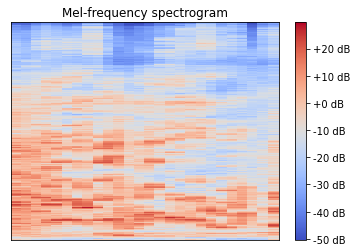

In [4]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
from utils import load_audio, audio2spectrogram

sr=22050
n_mels=128*8
n_fft=2048*8
hop_length=512*8
win_length=None

idx, input_ids, attention_mask, labelid, decoded, diaid, uttid, utt, utts = get_diaid_uttid_utts(ds, tokenizer)
print()
print(f"number of tokens in the sequence:  {input_ids.shape}")
print()

y = load_audio(DATASET, SPLIT, uttid, sr=sr)
print(f"audio length {y.shape}")
# IPython.display.Audio(data=y, rate=sr)


mels = audio2spectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=win_length, n_mels=n_mels)
print(f"mels shape {mels.shape}")
mels_db = librosa.power_to_db(mels)

fig, ax = plt.subplots()
img = librosa.display.specshow(mels_db)
fig.colorbar(img, ax=ax, format='%+2.0f dB');
ax.set(title='Mel-frequency spectrogram');

In [7]:
from utils import ErcAudioDataset

foo = ErcAudioDataset()

/home/tk/.virtualenvs/dev-python3.7/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2021-05-28 14:07:35.991 WARNING dataset - _load_utterance_ordered: number of not existing audio files: 1


In [6]:
from transformers import RobertaConfig, RobertaModel, RobertaForSequenceClassification
# Initializing a RoBERTa configuration
configuration = RobertaConfig()
# Initializing a model from the configuration
model = RobertaModel(configuration)
# Accessing the model configuration
configuration = model.config

In [29]:
configuration

RobertaConfig {
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.6.0.dev0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [30]:
model.num_parameters() / 1e6

109.48224

In [31]:
model_ =  RobertaForSequenceClassification.from_pretrained('roberta-large', num_labels=7)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classif

In [32]:
model_.num_parameters() / 1e6

355.366919

In [52]:
model_.base_model.encoder.layer

ModuleList(
  (0): RobertaLayer(
    (attention): RobertaAttention(
      (self): RobertaSelfAttention(
        (query): Linear(in_features=1024, out_features=1024, bias=True)
        (key): Linear(in_features=1024, out_features=1024, bias=True)
        (value): Linear(in_features=1024, out_features=1024, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (output): RobertaSelfOutput(
        (dense): Linear(in_features=1024, out_features=1024, bias=True)
        (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (intermediate): RobertaIntermediate(
      (dense): Linear(in_features=1024, out_features=4096, bias=True)
    )
    (output): RobertaOutput(
      (dense): Linear(in_features=4096, out_features=1024, bias=True)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (1): RobertaLayer(
    (attent